## Q4(b) Weighted Loss

In [1]:
from basic_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *

in starter_4
GPU_STATUS: True


In [2]:
class_weights = 1.0 / torch.FloatTensor([1.7796e-01, 6.1295e-01, 4.1182e-02, 8.9837e-03, 1.0163e-01, 6.8722e-03,
        1.4485e-03, 1.5937e-04, 4.7746e-02, 1.0698e-03])
# class_weights[9] = 0 # ignore unlabeled class
# class_weights

In [3]:
# def compute_class_weights(dataloader):
#     # Labels: batch_size x height x width
#     total_num_pixels = 0
#     n_class = 10
#     class_weights = torch.zeros(n_class)
#     for i, (inputs, labels) in enumerate(dataloader):
#         total_num_pixels += labels.shape[0] * labels.shape[1] * labels.shape[2]
#         for cur_class in range(n_class):
#             class_weights[cur_class] += torch.sum(labels == cur_class)
#         print("SANITY CHECK:", total_num_pixels, class_weights.sum())
#         print("class_weights:", class_weights)
        
#     return class_weights / total_num_pixels

In [4]:
# train_dataset_original_1 = TASDataset('tas500v1.1') 
# train_loader_1 = DataLoader(dataset=train_dataset_original_1, batch_size= 16, shuffle=False)

# class_weights = compute_class_weights(train_loader_1)
# print(class_weights)

In [5]:
#hyper param
epochs = 50   
lr = 0.0004
criterion = nn.CrossEntropyLoss(weight=class_weights, reduction="mean")# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
n_class = 10

print("creating model...")
fcn_model = FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_4b_50e"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

creating model...
GPU: True
Training...
in val


/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Loss at epoch: 0 is 1.9861929076058524
IoU at epoch: 0 is 0.043369678000308665
Pixel acc at epoch: 0 is 0.2641922043902533
in train


  0%|          | 0/50 [00:00<?, ?it/s]

epoch0, iter0, loss: 2.1279754638671875
epoch0, iter10, loss: 1.7979363203048706
epoch0, iter20, loss: 1.7864723205566406
epoch0, iter30, loss: 1.1220030784606934
epoch0, iter40, loss: 1.2204890251159668
epoch0, iter50, loss: 1.6639025211334229
Finish epoch 0, time elapsed 117.95796990394592
in val
Loss at epoch: 0 is 1.2919313737324305
IoU at epoch: 0 is 0.18425851466980975
Pixel acc at epoch: 0 is 0.6947004624775478


  2%|▏         | 1/50 [02:07<1:44:24, 127.85s/it]

epoch1, iter0, loss: 1.153496265411377
epoch1, iter10, loss: 0.9763152003288269
epoch1, iter20, loss: 1.1241902112960815
epoch1, iter30, loss: 0.9319305419921875
epoch1, iter40, loss: 0.9010312557220459
epoch1, iter50, loss: 0.7846697568893433
Finish epoch 1, time elapsed 115.46634459495544
in val


  4%|▍         | 2/50 [04:13<1:41:05, 126.37s/it]

Loss at epoch: 1 is 1.0758487156459264
IoU at epoch: 1 is 0.19594789428343315
Pixel acc at epoch: 1 is 0.7018877736159733
epoch2, iter0, loss: 0.9158647060394287
epoch2, iter10, loss: 0.8942570090293884
epoch2, iter20, loss: 1.0605180263519287
epoch2, iter30, loss: 1.1276729106903076
epoch2, iter40, loss: 1.1576647758483887
epoch2, iter50, loss: 0.7934122681617737
Finish epoch 2, time elapsed 116.02492070198059
in val


  6%|▌         | 3/50 [06:19<1:38:54, 126.26s/it]

Loss at epoch: 2 is 1.0284787161009652
IoU at epoch: 2 is 0.18843325167662917
Pixel acc at epoch: 2 is 0.7079025677272252
epoch3, iter0, loss: 0.7715678215026855
epoch3, iter10, loss: 0.9028139114379883
epoch3, iter20, loss: 0.9246737360954285
epoch3, iter30, loss: 0.8998304009437561
epoch3, iter40, loss: 1.1452217102050781
epoch3, iter50, loss: 0.9427645802497864
Finish epoch 3, time elapsed 116.14059901237488
in val


  8%|▊         | 4/50 [08:25<1:36:37, 126.04s/it]

Loss at epoch: 3 is 0.8317025644438607
IoU at epoch: 3 is 0.26917418894171286
Pixel acc at epoch: 3 is 0.736497061593192
epoch4, iter0, loss: 0.8115808963775635
epoch4, iter10, loss: 0.9242656230926514
epoch4, iter20, loss: 1.057130217552185
epoch4, iter30, loss: 0.8749573826789856
epoch4, iter40, loss: 1.0030059814453125
epoch4, iter50, loss: 0.6497523784637451
Finish epoch 4, time elapsed 118.6415467262268
in val


 10%|█         | 5/50 [10:32<1:35:00, 126.68s/it]

Loss at epoch: 4 is 0.7040531550134931
IoU at epoch: 4 is 0.32400643988258376
Pixel acc at epoch: 4 is 0.8026378069605146
epoch5, iter0, loss: 0.5652434825897217
epoch5, iter10, loss: 0.7775883078575134
epoch5, iter20, loss: 0.7736539840698242
epoch5, iter30, loss: 0.5421284437179565
epoch5, iter40, loss: 1.0829192399978638
epoch5, iter50, loss: 0.9165095090866089
Finish epoch 5, time elapsed 116.02343678474426
in val


 12%|█▏        | 6/50 [12:38<1:32:38, 126.33s/it]

Loss at epoch: 5 is 0.6525053637368339
IoU at epoch: 5 is 0.33674276926008345
Pixel acc at epoch: 5 is 0.8118006757327488
epoch6, iter0, loss: 0.9380921125411987
epoch6, iter10, loss: 0.5459460616111755
epoch6, iter20, loss: 0.6720477342605591
epoch6, iter30, loss: 0.5735703706741333
epoch6, iter40, loss: 0.8857343792915344
epoch6, iter50, loss: 0.7767188549041748
Finish epoch 6, time elapsed 117.34309196472168
in val


 14%|█▍        | 7/50 [14:44<1:30:32, 126.35s/it]

Loss at epoch: 6 is 0.59359923856599
IoU at epoch: 6 is 0.36362200706555575
Pixel acc at epoch: 6 is 0.826915272644588
epoch7, iter0, loss: 0.560304582118988
epoch7, iter10, loss: 0.6748952865600586
epoch7, iter20, loss: 0.6029266715049744
epoch7, iter30, loss: 0.6347110271453857
epoch7, iter40, loss: 0.5322154760360718
epoch7, iter50, loss: 0.9486958384513855
Finish epoch 7, time elapsed 123.13155794143677
in val


 16%|█▌        | 8/50 [16:57<1:29:51, 128.36s/it]

Loss at epoch: 7 is 0.5994393314634051
IoU at epoch: 7 is 0.3665490764865281
Pixel acc at epoch: 7 is 0.8119455661092486
epoch8, iter0, loss: 0.9112047553062439
epoch8, iter10, loss: 0.4346679449081421
epoch8, iter20, loss: 0.6284207105636597
epoch8, iter30, loss: 0.6063090562820435
epoch8, iter40, loss: 0.554474949836731
epoch8, iter50, loss: 0.5883113145828247
Finish epoch 8, time elapsed 120.55826926231384
in val


 18%|█▊        | 9/50 [19:07<1:28:08, 129.00s/it]

Loss at epoch: 8 is 0.6161804454667228
IoU at epoch: 8 is 0.35533580213641036
Pixel acc at epoch: 8 is 0.818021970135825
epoch9, iter0, loss: 0.4305691421031952
epoch9, iter10, loss: 0.7508143782615662
epoch9, iter20, loss: 0.7404276728630066
epoch9, iter30, loss: 0.4161757826805115
epoch9, iter40, loss: 0.724743127822876
epoch9, iter50, loss: 0.607166588306427
Finish epoch 9, time elapsed 124.72452926635742
in val


 20%|██        | 10/50 [21:22<1:27:14, 130.86s/it]

Loss at epoch: 9 is 0.5602729661124093
IoU at epoch: 9 is 0.3738386318704764
Pixel acc at epoch: 9 is 0.8270209431648254
epoch10, iter0, loss: 0.4636337459087372
epoch10, iter10, loss: 0.772111177444458
epoch10, iter20, loss: 0.49535486102104187
epoch10, iter30, loss: 0.45195722579956055
epoch10, iter40, loss: 0.5569034814834595
epoch10, iter50, loss: 0.6675465703010559
Finish epoch 10, time elapsed 116.63681697845459
in val


 22%|██▏       | 11/50 [23:29<1:24:07, 129.42s/it]

Loss at epoch: 10 is 0.49276877301079886
IoU at epoch: 10 is 0.4195743568347255
Pixel acc at epoch: 10 is 0.84232668365751
epoch11, iter0, loss: 0.3519996404647827
epoch11, iter10, loss: 0.42626333236694336
epoch11, iter20, loss: 0.43446940183639526
epoch11, iter30, loss: 0.4555642306804657
epoch11, iter40, loss: 0.3524344265460968
epoch11, iter50, loss: 0.9714365005493164
Finish epoch 11, time elapsed 115.77164435386658
in val


 24%|██▍       | 12/50 [25:33<1:21:05, 128.04s/it]

Loss at epoch: 11 is 0.4684838993208749
IoU at epoch: 11 is 0.41102619324359807
Pixel acc at epoch: 11 is 0.854151725769043
epoch12, iter0, loss: 0.36772966384887695
epoch12, iter10, loss: 0.852883517742157
epoch12, iter20, loss: 0.3784724473953247
epoch12, iter30, loss: 0.4384946823120117
epoch12, iter40, loss: 0.43490535020828247
epoch12, iter50, loss: 0.5313754677772522
Finish epoch 12, time elapsed 115.15100288391113
in val


 26%|██▌       | 13/50 [27:38<1:18:18, 126.98s/it]

Loss at epoch: 12 is 0.4768281323569162
IoU at epoch: 12 is 0.416742691850116
Pixel acc at epoch: 12 is 0.8439194985798427
epoch13, iter0, loss: 0.5206332206726074
epoch13, iter10, loss: 0.6132662892341614
epoch13, iter20, loss: 0.6072882413864136
epoch13, iter30, loss: 0.7683204412460327
epoch13, iter40, loss: 0.4135764539241791
epoch13, iter50, loss: 0.5341272950172424
Finish epoch 13, time elapsed 117.76414394378662
in val


 28%|██▊       | 14/50 [29:44<1:16:03, 126.76s/it]

Loss at epoch: 13 is 0.4870203861168453
IoU at epoch: 13 is 0.42530433497043046
Pixel acc at epoch: 13 is 0.8515101160321917
epoch14, iter0, loss: 0.4326472580432892
epoch14, iter10, loss: 0.5063856244087219
epoch14, iter20, loss: 0.49799877405166626
epoch14, iter30, loss: 0.4672758877277374
epoch14, iter40, loss: 0.39191287755966187
epoch14, iter50, loss: 0.3053237497806549
Finish epoch 14, time elapsed 121.26407599449158
in val


 30%|███       | 15/50 [31:55<1:14:36, 127.89s/it]

Loss at epoch: 14 is 0.4695621303149632
IoU at epoch: 14 is 0.3957076155939066
Pixel acc at epoch: 14 is 0.8563881175858634
epoch15, iter0, loss: 0.48227658867836
epoch15, iter10, loss: 0.540319561958313
epoch15, iter20, loss: 0.3721688687801361
epoch15, iter30, loss: 0.4340200126171112
epoch15, iter40, loss: 0.46826595067977905
epoch15, iter50, loss: 0.35798346996307373
Finish epoch 15, time elapsed 118.1656482219696
in val


 32%|███▏      | 16/50 [34:03<1:12:27, 127.86s/it]

Loss at epoch: 15 is 0.40651099170957294
IoU at epoch: 15 is 0.4509024100451806
Pixel acc at epoch: 15 is 0.8700241446495056
epoch16, iter0, loss: 0.3310985863208771
epoch16, iter10, loss: 0.29970255494117737
epoch16, iter20, loss: 0.3403630256652832
epoch16, iter30, loss: 0.616712749004364
epoch16, iter40, loss: 0.4031403958797455
epoch16, iter50, loss: 0.7801207900047302
Finish epoch 16, time elapsed 120.30987763404846
in val


 34%|███▍      | 17/50 [36:13<1:10:45, 128.66s/it]

Loss at epoch: 16 is 0.49962266428130014
IoU at epoch: 16 is 0.4048973088651101
Pixel acc at epoch: 16 is 0.8468887720789228
epoch17, iter0, loss: 0.49334752559661865
epoch17, iter10, loss: 0.5189381837844849
epoch17, iter20, loss: 0.898604154586792
epoch17, iter30, loss: 0.40283581614494324
epoch17, iter40, loss: 0.4628921151161194
epoch17, iter50, loss: 1.0538315773010254
Finish epoch 17, time elapsed 121.87753963470459
in val


 36%|███▌      | 18/50 [38:23<1:08:53, 129.18s/it]

Loss at epoch: 17 is 0.49456775188446045
IoU at epoch: 17 is 0.396700587892337
Pixel acc at epoch: 17 is 0.8363221713474819
epoch18, iter0, loss: 0.39986860752105713
epoch18, iter10, loss: 0.7146075367927551
epoch18, iter20, loss: 0.3623940646648407
epoch18, iter30, loss: 0.6253769993782043
epoch18, iter40, loss: 0.3897801339626312
epoch18, iter50, loss: 0.34679558873176575
Finish epoch 18, time elapsed 117.75395560264587
in val


 38%|███▊      | 19/50 [40:31<1:06:30, 128.74s/it]

Loss at epoch: 18 is 0.5191621822970254
IoU at epoch: 18 is 0.41523161698742544
Pixel acc at epoch: 18 is 0.8349044152668544
epoch19, iter0, loss: 0.668096125125885
epoch19, iter10, loss: 0.6990940570831299
epoch19, iter20, loss: 0.4702771008014679
epoch19, iter30, loss: 0.5743891000747681
epoch19, iter40, loss: 0.28528696298599243
epoch19, iter50, loss: 0.36694592237472534
Finish epoch 19, time elapsed 122.68959403038025
in val


 40%|████      | 20/50 [42:44<1:04:54, 129.81s/it]

Loss at epoch: 19 is 0.3721203612429755
IoU at epoch: 19 is 0.4429354035996117
Pixel acc at epoch: 19 is 0.8797067318643842
epoch20, iter0, loss: 0.5075875520706177
epoch20, iter10, loss: 0.5532656311988831
epoch20, iter20, loss: 0.4076744318008423
epoch20, iter30, loss: 0.3124135136604309
epoch20, iter40, loss: 0.2380276471376419
epoch20, iter50, loss: 0.3187330961227417
Finish epoch 20, time elapsed 121.48430180549622
in val


 42%|████▏     | 21/50 [44:54<1:02:48, 129.93s/it]

Loss at epoch: 20 is 0.37134609264986856
IoU at epoch: 20 is 0.4459328604672688
Pixel acc at epoch: 20 is 0.8777738043240139
epoch21, iter0, loss: 0.49365493655204773
epoch21, iter10, loss: 0.37719130516052246
epoch21, iter20, loss: 0.5379014611244202
epoch21, iter30, loss: 0.23468929529190063
epoch21, iter40, loss: 0.5363537669181824
epoch21, iter50, loss: 0.2854960560798645
Finish epoch 21, time elapsed 115.94902729988098
in val


 44%|████▍     | 22/50 [46:59<1:00:02, 128.65s/it]

Loss at epoch: 21 is 0.4019592212779181
IoU at epoch: 21 is 0.42928629629092196
Pixel acc at epoch: 21 is 0.8640764355659485
epoch22, iter0, loss: 0.2310565561056137
epoch22, iter10, loss: 0.32027915120124817
epoch22, iter20, loss: 0.8706484436988831
epoch22, iter30, loss: 0.7919754385948181
epoch22, iter40, loss: 0.28214263916015625
epoch22, iter50, loss: 0.3391122817993164
Finish epoch 22, time elapsed 117.0061707496643
in val


 46%|████▌     | 23/50 [49:05<57:28, 127.74s/it]  

Loss at epoch: 22 is 0.36197010959897724
IoU at epoch: 22 is 0.46911957494221845
Pixel acc at epoch: 22 is 0.8758648548807416
epoch23, iter0, loss: 0.24967776238918304
epoch23, iter10, loss: 0.23778660595417023
epoch23, iter20, loss: 0.28399747610092163
epoch23, iter30, loss: 0.3525162637233734
epoch23, iter40, loss: 0.38943666219711304
epoch23, iter50, loss: 0.6092259883880615
Finish epoch 23, time elapsed 111.43392300605774
in val


 48%|████▊     | 24/50 [51:05<54:21, 125.44s/it]

Loss at epoch: 23 is 0.354141429066658
IoU at epoch: 23 is 0.48883950946409704
Pixel acc at epoch: 23 is 0.8807707514081683
epoch24, iter0, loss: 0.5143814086914062
epoch24, iter10, loss: 0.24279485642910004
epoch24, iter20, loss: 0.30499571561813354
epoch24, iter30, loss: 0.28112709522247314
epoch24, iter40, loss: 0.2967059314250946
epoch24, iter50, loss: 0.3502947986125946
Finish epoch 24, time elapsed 114.6296694278717
in val


 50%|█████     | 25/50 [53:09<52:03, 124.95s/it]

Loss at epoch: 24 is 0.4005430723939623
IoU at epoch: 24 is 0.44768405810833745
Pixel acc at epoch: 24 is 0.8647216473306928
epoch25, iter0, loss: 0.3207290768623352
epoch25, iter10, loss: 0.5254729390144348
epoch25, iter20, loss: 0.5663504600524902
epoch25, iter30, loss: 0.3863644599914551
epoch25, iter40, loss: 0.3339240849018097
epoch25, iter50, loss: 0.3281339704990387
Finish epoch 25, time elapsed 115.74782061576843
in val


 52%|█████▏    | 26/50 [55:13<49:55, 124.79s/it]

Loss at epoch: 25 is 0.3913726104157312
IoU at epoch: 25 is 0.4713459531270755
Pixel acc at epoch: 25 is 0.8625137805938721
epoch26, iter0, loss: 0.3133079707622528
epoch26, iter10, loss: 0.29999876022338867
epoch26, iter20, loss: 0.3582330644130707
epoch26, iter30, loss: 0.3772849440574646
epoch26, iter40, loss: 0.4146798551082611
epoch26, iter50, loss: 0.32721224427223206
Finish epoch 26, time elapsed 115.81537008285522
in val


 54%|█████▍    | 27/50 [57:19<47:56, 125.05s/it]

Loss at epoch: 26 is 0.36893574467727114
IoU at epoch: 26 is 0.4668877835946558
Pixel acc at epoch: 26 is 0.8644605023520333
epoch27, iter0, loss: 0.5372565984725952
epoch27, iter10, loss: 0.3884385824203491
epoch27, iter20, loss: 0.26873818039894104
epoch27, iter30, loss: 0.5724363923072815
epoch27, iter40, loss: 0.5025799870491028
epoch27, iter50, loss: 0.2449207901954651
Finish epoch 27, time elapsed 115.09021806716919
in val


 56%|█████▌    | 28/50 [59:24<45:52, 125.09s/it]

Loss at epoch: 27 is 0.3358816291604723
IoU at epoch: 27 is 0.49854478536674207
Pixel acc at epoch: 27 is 0.8909075260162354
epoch28, iter0, loss: 0.30220797657966614
epoch28, iter10, loss: 0.26147592067718506
epoch28, iter20, loss: 0.169037327170372
epoch28, iter30, loss: 0.42385372519493103
epoch28, iter40, loss: 0.23493146896362305
epoch28, iter50, loss: 0.23717695474624634
Finish epoch 28, time elapsed 116.92529249191284
in val


 58%|█████▊    | 29/50 [1:01:31<43:55, 125.52s/it]

Loss at epoch: 28 is 0.3572248177868979
IoU at epoch: 28 is 0.4993777630568527
Pixel acc at epoch: 28 is 0.8849488241331918
epoch29, iter0, loss: 0.2919870615005493
epoch29, iter10, loss: 0.2699671685695648
epoch29, iter20, loss: 0.38057851791381836
epoch29, iter30, loss: 0.25622108578681946
epoch29, iter40, loss: 0.41664013266563416
epoch29, iter50, loss: 0.5138719081878662
Finish epoch 29, time elapsed 122.0071313381195
in val


 60%|██████    | 30/50 [1:03:42<42:23, 127.18s/it]

Loss at epoch: 29 is 0.3646935650280544
IoU at epoch: 29 is 0.4803133652266484
Pixel acc at epoch: 29 is 0.8728248306683132
epoch30, iter0, loss: 0.37735792994499207
epoch30, iter10, loss: 0.2891782522201538
epoch30, iter20, loss: 0.40650421380996704
epoch30, iter30, loss: 0.34287744760513306
epoch30, iter40, loss: 0.2362341582775116
epoch30, iter50, loss: 0.17082683742046356
Finish epoch 30, time elapsed 117.92105555534363
in val


 62%|██████▏   | 31/50 [1:05:49<40:16, 127.18s/it]

Loss at epoch: 30 is 0.3182879388332367
IoU at epoch: 30 is 0.5032192496796607
Pixel acc at epoch: 30 is 0.8938530598367963
epoch31, iter0, loss: 0.37709254026412964
epoch31, iter10, loss: 0.41627374291419983
epoch31, iter20, loss: 0.2681727111339569
epoch31, iter30, loss: 0.42684313654899597
epoch31, iter40, loss: 0.2997640371322632
epoch31, iter50, loss: 0.352946937084198
Finish epoch 31, time elapsed 120.5758285522461
in val


 64%|██████▍   | 32/50 [1:07:58<38:19, 127.76s/it]

Loss at epoch: 31 is 0.42454817465373446
IoU at epoch: 31 is 0.4645762467598182
Pixel acc at epoch: 31 is 0.8633324929646083
epoch32, iter0, loss: 0.275407612323761
epoch32, iter10, loss: 0.24013648927211761
epoch32, iter20, loss: 0.2873605787754059
epoch32, iter30, loss: 0.3697245121002197
epoch32, iter40, loss: 0.29948681592941284
epoch32, iter50, loss: 0.2990943193435669
Finish epoch 32, time elapsed 122.29691815376282
in val


 66%|██████▌   | 33/50 [1:10:09<36:28, 128.76s/it]

Loss at epoch: 32 is 0.3591392593724387
IoU at epoch: 32 is 0.43321398004431216
Pixel acc at epoch: 32 is 0.8795045188495091
epoch33, iter0, loss: 0.24769708514213562
epoch33, iter10, loss: 0.30704039335250854
epoch33, iter20, loss: 0.19537749886512756
epoch33, iter30, loss: 0.26338887214660645
epoch33, iter40, loss: 0.27616286277770996
epoch33, iter50, loss: 0.30634480714797974
Finish epoch 33, time elapsed 121.45799422264099
in val


 68%|██████▊   | 34/50 [1:12:20<34:29, 129.34s/it]

Loss at epoch: 33 is 0.39667439673628124
IoU at epoch: 33 is 0.47998741651803906
Pixel acc at epoch: 33 is 0.8630259888512748
epoch34, iter0, loss: 0.38786986470222473
epoch34, iter10, loss: 0.3252143859863281
epoch34, iter20, loss: 0.20638513565063477
epoch34, iter30, loss: 0.2529970407485962
epoch34, iter40, loss: 0.3003188967704773
epoch34, iter50, loss: 0.43542733788490295
Finish epoch 34, time elapsed 112.37828516960144
in val


 70%|███████   | 35/50 [1:14:22<31:47, 127.13s/it]

Loss at epoch: 34 is 0.3174112354006086
IoU at epoch: 34 is 0.5269623426360167
Pixel acc at epoch: 34 is 0.8890966517584664
epoch35, iter0, loss: 0.33436357975006104
epoch35, iter10, loss: 0.2652728259563446
epoch35, iter20, loss: 0.35615435242652893
epoch35, iter30, loss: 0.3144128620624542
epoch35, iter40, loss: 0.3247542381286621
epoch35, iter50, loss: 0.5185046792030334
Finish epoch 35, time elapsed 112.9801971912384
in val


 72%|███████▏  | 36/50 [1:16:23<29:14, 125.33s/it]

Loss at epoch: 35 is 0.3087285501616342
IoU at epoch: 35 is 0.5189063448736898
Pixel acc at epoch: 35 is 0.8933450494493756
epoch36, iter0, loss: 0.35306334495544434
epoch36, iter10, loss: 0.24011754989624023
epoch36, iter20, loss: 0.28238174319267273
epoch36, iter30, loss: 0.2470831274986267
epoch36, iter40, loss: 0.23232248425483704
epoch36, iter50, loss: 0.28437328338623047
Finish epoch 36, time elapsed 116.0016872882843
in val


 74%|███████▍  | 37/50 [1:18:29<27:10, 125.40s/it]

Loss at epoch: 36 is 0.3157333476202829
IoU at epoch: 36 is 0.5300199514548738
Pixel acc at epoch: 36 is 0.889951365334647
epoch37, iter0, loss: 0.2836875915527344
epoch37, iter10, loss: 0.3782636225223541
epoch37, iter20, loss: 0.5883047580718994
epoch37, iter30, loss: 0.36737439036369324
epoch37, iter40, loss: 0.5373669862747192
epoch37, iter50, loss: 0.2820192575454712
Finish epoch 37, time elapsed 112.46055483818054
in val


 76%|███████▌  | 38/50 [1:20:30<24:52, 124.35s/it]

Loss at epoch: 37 is 0.36470199057034086
IoU at epoch: 37 is 0.45318199980575297
Pixel acc at epoch: 37 is 0.8788270439420428
epoch38, iter0, loss: 0.25022271275520325
epoch38, iter10, loss: 0.2199970930814743
epoch38, iter20, loss: 0.2234705090522766
epoch38, iter30, loss: 0.44840991497039795
epoch38, iter40, loss: 0.19128276407718658
epoch38, iter50, loss: 0.37469980120658875
Finish epoch 38, time elapsed 115.15100407600403
in val


 78%|███████▊  | 39/50 [1:22:34<22:45, 124.11s/it]

Loss at epoch: 38 is 0.3393272246633257
IoU at epoch: 38 is 0.5076766053137521
Pixel acc at epoch: 38 is 0.8828153439930507
epoch39, iter0, loss: 0.3054000437259674
epoch39, iter10, loss: 0.292898029088974
epoch39, iter20, loss: 0.5036078691482544
epoch39, iter30, loss: 0.2853315472602844
epoch39, iter40, loss: 0.39050549268722534
epoch39, iter50, loss: 0.2954046428203583
Finish epoch 39, time elapsed 116.30189538002014
in val


 80%|████████  | 40/50 [1:24:39<20:43, 124.39s/it]

Loss at epoch: 39 is 0.3072936534881592
IoU at epoch: 39 is 0.5090711046157392
Pixel acc at epoch: 39 is 0.8955250382423401
epoch40, iter0, loss: 0.33989036083221436
epoch40, iter10, loss: 0.2954252064228058
epoch40, iter20, loss: 0.4862042963504791
epoch40, iter30, loss: 0.30130088329315186
epoch40, iter40, loss: 0.41025063395500183
epoch40, iter50, loss: 0.16548633575439453
Finish epoch 40, time elapsed 108.88242602348328
in val
Loss at epoch: 40 is 0.30862009099551607
IoU at epoch: 40 is 0.5330968160562898
Pixel acc at epoch: 40 is 0.8922726001058306


 82%|████████▏ | 41/50 [1:26:36<18:20, 122.28s/it]

epoch41, iter0, loss: 0.16099220514297485
epoch41, iter10, loss: 0.5512427091598511
epoch41, iter20, loss: 0.19402773678302765
epoch41, iter30, loss: 0.33128124475479126
epoch41, iter40, loss: 0.20047837495803833
epoch41, iter50, loss: 0.22325590252876282
Finish epoch 41, time elapsed 105.43334555625916
in val


 84%|████████▍ | 42/50 [1:28:30<15:56, 119.57s/it]

Loss at epoch: 41 is 0.32917146171842304
IoU at epoch: 41 is 0.5174300551425115
Pixel acc at epoch: 41 is 0.8848308409963336
epoch42, iter0, loss: 0.20982131361961365
epoch42, iter10, loss: 0.23170998692512512
epoch42, iter20, loss: 0.17602388560771942
epoch42, iter30, loss: 0.34479817748069763
epoch42, iter40, loss: 0.4219098389148712
epoch42, iter50, loss: 0.3065592050552368
Finish epoch 42, time elapsed 107.80487251281738
in val


 86%|████████▌ | 43/50 [1:30:26<13:50, 118.65s/it]

Loss at epoch: 42 is 0.30369044627462116
IoU at epoch: 42 is 0.5295557829131934
Pixel acc at epoch: 42 is 0.8963449682508197
epoch43, iter0, loss: 0.45043855905532837
epoch43, iter10, loss: 0.21793997287750244
epoch43, iter20, loss: 0.253527969121933
epoch43, iter30, loss: 0.29954907298088074
epoch43, iter40, loss: 0.16871625185012817
epoch43, iter50, loss: 0.283716082572937
Finish epoch 43, time elapsed 110.62840700149536
in val


 88%|████████▊ | 44/50 [1:32:26<11:53, 118.90s/it]

Loss at epoch: 43 is 0.2798609733581543
IoU at epoch: 43 is 0.5631704415217657
Pixel acc at epoch: 43 is 0.9032942482403347
epoch44, iter0, loss: 0.2693951427936554
epoch44, iter10, loss: 0.29606565833091736
epoch44, iter20, loss: 0.45835748314857483
epoch44, iter30, loss: 0.31574341654777527
epoch44, iter40, loss: 0.3128744661808014
epoch44, iter50, loss: 0.2898153066635132
Finish epoch 44, time elapsed 114.9966881275177
in val


 90%|█████████ | 45/50 [1:34:29<10:01, 120.22s/it]

Loss at epoch: 44 is 0.3064402086394174
IoU at epoch: 44 is 0.5279847651432242
Pixel acc at epoch: 44 is 0.8883564812796456
epoch45, iter0, loss: 0.44517776370048523
epoch45, iter10, loss: 0.19231130182743073
epoch45, iter20, loss: 0.19880378246307373
epoch45, iter30, loss: 0.35687899589538574
epoch45, iter40, loss: 0.27385157346725464
epoch45, iter50, loss: 0.26234737038612366
Finish epoch 45, time elapsed 110.72831416130066
in val


 92%|█████████▏| 46/50 [1:36:28<07:58, 119.75s/it]

Loss at epoch: 45 is 0.328968950680324
IoU at epoch: 45 is 0.5344872911883858
Pixel acc at epoch: 45 is 0.8962082692555019
epoch46, iter0, loss: 0.13419847190380096
epoch46, iter10, loss: 0.2530004680156708
epoch46, iter20, loss: 0.25047850608825684
epoch46, iter30, loss: 0.23214037716388702
epoch46, iter40, loss: 0.2909470796585083
epoch46, iter50, loss: 0.3202310800552368
Finish epoch 46, time elapsed 112.01710915565491
in val


 94%|█████████▍| 47/50 [1:38:28<06:00, 120.04s/it]

Loss at epoch: 46 is 0.3198586915220533
IoU at epoch: 46 is 0.544820217056339
Pixel acc at epoch: 46 is 0.8903883525303432
epoch47, iter0, loss: 0.3274334669113159
epoch47, iter10, loss: 0.33937424421310425
epoch47, iter20, loss: 0.3322528600692749
epoch47, iter30, loss: 0.3008234202861786
epoch47, iter40, loss: 0.2580054700374603
epoch47, iter50, loss: 0.16939705610275269
Finish epoch 47, time elapsed 112.62384915351868
in val


 96%|█████████▌| 48/50 [1:40:30<04:00, 120.43s/it]

Loss at epoch: 47 is 0.3183105992419379
IoU at epoch: 47 is 0.5238693514236815
Pixel acc at epoch: 47 is 0.8890230315072196
epoch48, iter0, loss: 0.26675570011138916
epoch48, iter10, loss: 0.2598935067653656
epoch48, iter20, loss: 0.4708494544029236
epoch48, iter30, loss: 0.317414253950119
epoch48, iter40, loss: 0.2757090926170349
epoch48, iter50, loss: 0.33232611417770386
Finish epoch 48, time elapsed 106.77273321151733
in val


 98%|█████████▊| 49/50 [1:42:25<01:58, 118.93s/it]

Loss at epoch: 48 is 0.2914543109280722
IoU at epoch: 48 is 0.5459419132797242
Pixel acc at epoch: 48 is 0.9043172342436654
epoch49, iter0, loss: 0.3225902318954468
epoch49, iter10, loss: 0.19483663141727448
epoch49, iter20, loss: 0.2802344560623169
epoch49, iter30, loss: 0.5200448036193848
epoch49, iter40, loss: 0.1353214532136917
epoch49, iter50, loss: 0.24413816630840302
Finish epoch 49, time elapsed 105.06203961372375
in val


100%|██████████| 50/50 [1:44:19<00:00, 125.18s/it]

Loss at epoch: 49 is 0.3174147201435907
IoU at epoch: 49 is 0.5491271095037634
Pixel acc at epoch: 49 is 0.8949935606547764


In [6]:
latest_fcn_model = torch.load(model_name)
print(type(latest_fcn_model))
latest_fcn_model.to(device)
test(latest_fcn_model)

<class 'basic_fcn.FCN'>
in test
Loss :is 0.2413120503936495
IoU is 0.5482512088842783
Pixel is 0.9225999627794538


0

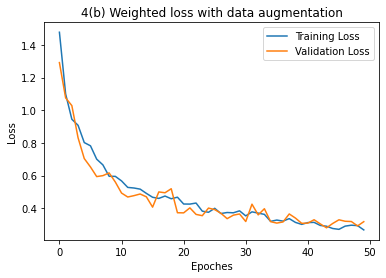

In [7]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("4(b) Weighted loss with data augmentation")
plt.savefig("plots/Q4_b_50e")
plt.show()

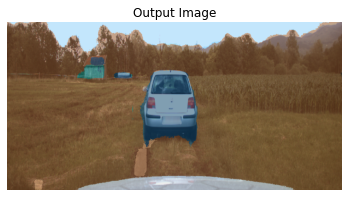

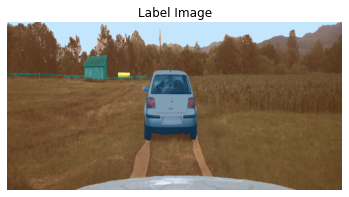

0

In [8]:
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)
visualize(model_name, test_loader, device)